In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import pandas as pd 
import sys

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
analyzer = SentimentIntensityAnalyzer()

sys.path.append("../../../")

# Twitter API Keys
from config import (consumer_key, consumer_secret, access_token, access_token_secret)

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
sentiments = []
target_terms = "@BBCWorld", "@CBSNews", "@theelenshow"

for user in target_terms:
    counter=0
    user_tweets= api.user_timeline(user, count=100)
    for tweet in user_tweets:   
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago=counter
        
        sentiments.append({"User": user, "Compound": compound, 
                           "Positive": pos, "Negative": neg, "Neutral": neu, "Tweets Ago": counter})
        counter=counter+1


In [6]:
# Convert sentiments to DataFrame
twitter_df = pd.DataFrame(sentiments)
twitter_df.head()

Compound  Negative  Neutral  Positive  Tweets Ago       User
0    0.0000     0.000    1.000       0.0           0  @BBCWorld
1    0.0000     0.000    1.000       0.0           1  @BBCWorld
2   -0.6249     0.389    0.611       0.0           2  @BBCWorld
3   -0.3400     0.159    0.841       0.0           3  @BBCWorld
4   -0.7351     0.470    0.530       0.0           4  @BBCWorld

<IPython.core.display.Javascript object>


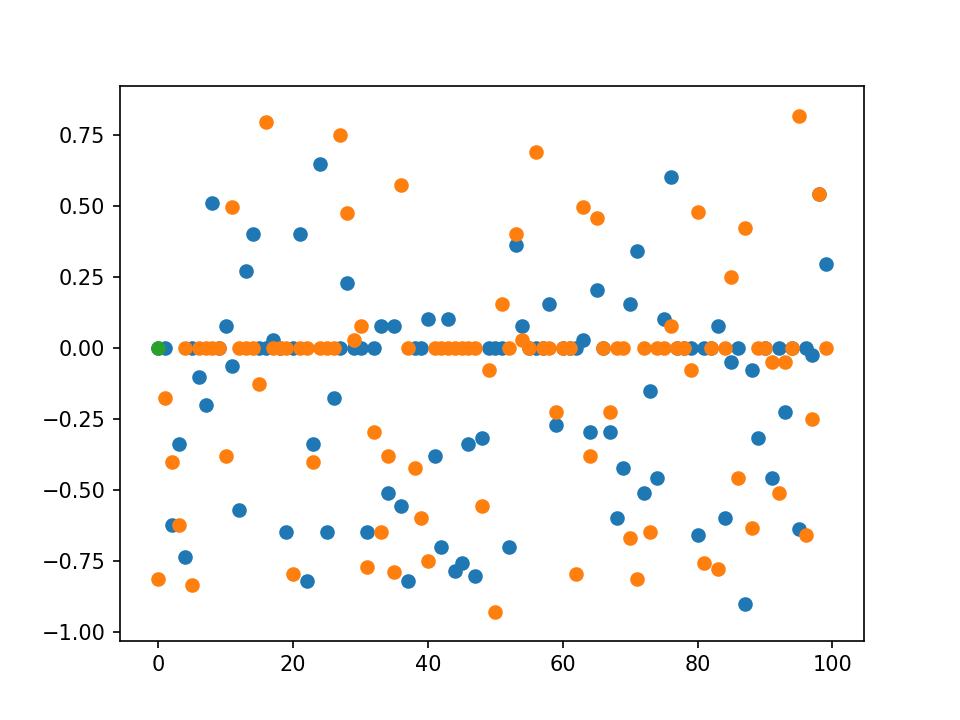

In [26]:
# Create plot
for user in target_terms:
    twitter_df_2=twitter_df.loc[twitter_df["User"]==user]
    plt.scatter(twitter_df_2["Tweets Ago"], twitter_df_2["Compound"])
    plt.show()   

In [ ]:
# Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets ")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid()

In [ ]:
#save picture
plt.savefig('Images/e.light_picture.png')

In [ ]:
# Here we create a legend:
# we'll plot empty lists with the desired size and label
for tweets in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=user,
                label=str(twitter_df_2) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Tweeters')

plt.title('Tweeters');